# Lab 6: Midterm review


In [2]:
options(repr.plot.width=6, repr.plot.height=5)

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.4.3”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# 1. Practice Midterm

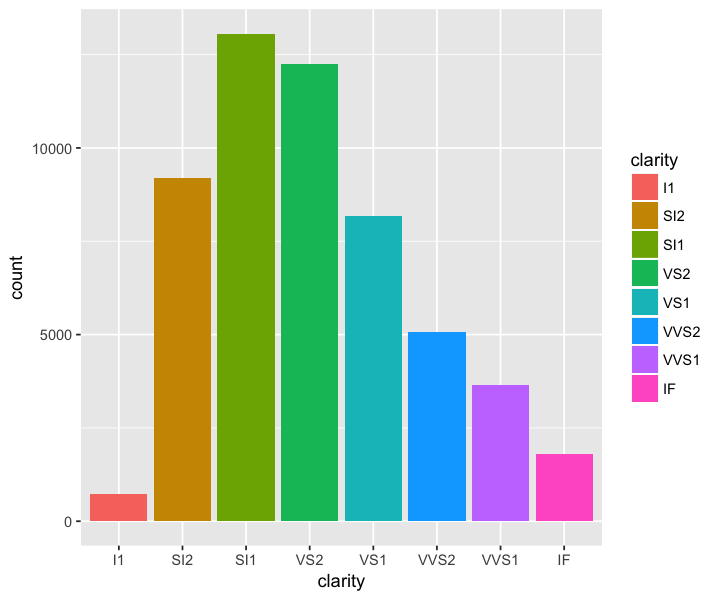

In [110]:
# Question 6
ggplot(diamonds, aes(x=clarity, fill=clarity)) +
    geom_bar()

Warning message:
“Removed 1 rows containing non-finite values (stat_bin2d).”

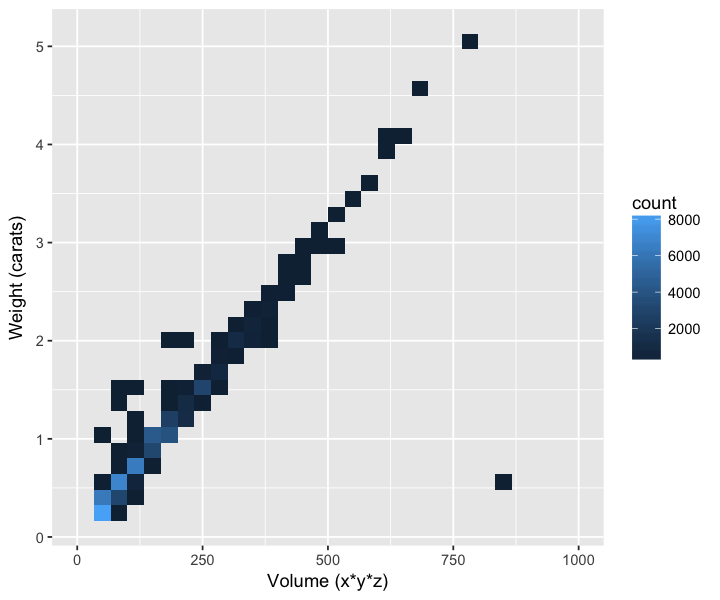

In [111]:
# Question 7
ggplot(diamonds, aes(x=x*y*z, y=carat)) + 
    geom_bin2d() + xlim(0, 1000) + 
    labs(x="Volume (x*y*z)", y="Weight (carats)")

In [97]:
# Question 8
year_mpg = mpg %>% group_by(manufacturer, model, year) %>% 
    summarize(cty = mean(cty), hwy = mean(hwy)) %>% 
    gather(key=var, value=value, cty, hwy) %>% 
    unite(var_year, var, year, sep='') %>% spread(key=var_year, value=value)
head(year_mpg)

manufacturer,model,cty1999,cty2008,hwy1999,hwy2008
audi,a4,18.25,19.66667,27.50,29.33333
audi,a4 quattro,16.50,17.75000,25.25,26.25000
audi,a6 quattro,15.00,16.50000,24.00,24.00000
chevrolet,c1500 suburban 2wd,13.00,12.75000,17.00,18.00000
chevrolet,corvette,15.50,15.33333,24.50,25.00000
chevrolet,k1500 tahoe 4wd,12.50,12.50000,16.00,16.50000


In [147]:
# Question 9
require(nycflights13)

dep_rainy = weather %>% group_by(origin, year, month, day) %>%
    summarize(rainy = (min(temp, na.rm=TRUE)>32) & (sum(precip, na.rm=TRUE)>0))

dep_flights1 = flights %>% filter(!is.na(sched_dep_time)) %>% filter(year == 2013) %>%
    select(origin, year, month, day, sched_dep_time, tailnum) %>% left_join(dep_rainy)

dep_flights1 %>% filter(rainy) %>% nrow

Joining, by = c("origin", "year", "month", "day")


[1] 90596

In [127]:
# Question 10
load(url('https://github.com/terhorst/stats306/raw/master/ps4/cfb.RData'))

# cfb %>% filter(Year==2018) %>% unite(wconf, `Winning Conference`, Winning, sep="_") %>%
#         unite(lconf, `Losing Conference`, Losing, sep="_") %>%
#         gather(wconf, lconf, key="wl", value="conf_team") %>%
#         separate(conf_team, into=c("Conference", "Team"), sep="_") %>%
#         filter(Conference == "Big 10") %>% distinct(Team, Conference)

cfb1 = cfb %>% select(`Losing Conference`, `Winning Conference`, Winning, Losing) %>%
    unite(win_conf_team, `Winning Conference`, Winning, sep="_") %>%
    unite(lose_conf_team, `Losing Conference`, Losing, sep="_")
cfb2 = cfb1 %>% gather(win_conf_team, lose_conf_team, key=var, value=conf_team)
cfb3 = cfb2 %>% separate(conf_team, into=c("Conference", "Team"), sep="_")
cfb4 = cfb3 %>% filter(Conference == "Big 10") %>% distinct(Team, Conference)

head(cfb1)
head(cfb2)
head(cfb3)
cfb4


lose_conf_team,win_conf_team
Sun Belt_North Texas,Sun Belt_FIU
MWC_UNLV,Big 10_Wisconsin
CUSA_Memphis,SEC_Mississippi State
ACC_Wake Forest,Big East_Syracuse
WAC_Idaho,MAC_Bowling Green
Sun Belt_W. Kentucky,SEC_Kentucky


var,conf_team
win_conf_team,Sun Belt_FIU
win_conf_team,Big 10_Wisconsin
win_conf_team,SEC_Mississippi State
win_conf_team,Big East_Syracuse
win_conf_team,MAC_Bowling Green
win_conf_team,SEC_Kentucky


var,Conference,Team
win_conf_team,Sun Belt,FIU
win_conf_team,Big 10,Wisconsin
win_conf_team,SEC,Mississippi State
win_conf_team,Big East,Syracuse
win_conf_team,MAC,Bowling Green
win_conf_team,SEC,Kentucky


Conference,Team
Big 10,Wisconsin
Big 10,Ohio State
Big 10,Northwestern
Big 10,Purdue
Big 10,Michigan
Big 10,Illinois
Big 10,Michigan State
Big 10,Nebraska
Big 10,Penn State
Big 10,Iowa


In [126]:
# Question 11
mpg %>% filter(year==1999, drv==4) %>% 
    group_by(manufacturer) %>% summarize(total = n()) %>% 
    arrange(desc(total))

manufacturer,total
dodge,10
ford,9
toyota,9
subaru,6
audi,5
chevrolet,2
jeep,2
land rover,2
mercury,2
nissan,2


# 2. Reproduce the following plots using the following dataset

In [91]:
set.seed(198436)
rand_idx = runif(1000, min=1, max=dim(diamonds)[1])
dm = diamonds[rand_idx, ]
glimpse(dm)

Observations: 1,000
Variables: 10
$ carat   <dbl> 0.72, 0.52, 0.30, 2.04, 0.54, 0.41, 0.38, 0.53, 1.52, 0.70,...
$ cut     <ord> Very Good, Premium, Very Good, Very Good, Ideal, Ideal, Ide...
$ color   <ord> E, H, J, H, G, F, G, D, H, J, H, H, E, F, H, D, H, G, G, D,...
$ clarity <ord> SI1, SI1, VS1, SI2, VVS2, SI1, VVS2, VS2, SI1, IF, SI1, VS1...
$ depth   <dbl> 58.9, 61.6, 63.4, 62.7, 61.2, 61.4, 61.0, 61.2, 60.1, 60.5,...
$ table   <dbl> 58, 57, 57, 56, 56, 57, 56, 55, 60, 59, 61, 56, 55, 59, 59,...
$ price   <int> 2646, 1138, 506, 15618, 1914, 753, 943, 1857, 10330, 2150, ...
$ x       <dbl> 5.88, 5.20, 4.26, 8.06, 5.25, 4.76, 4.67, 5.21, 7.47, 5.67,...
$ y       <dbl> 5.91, 5.15, 4.23, 8.12, 5.30, 4.79, 4.71, 5.25, 7.45, 5.73,...
$ z       <dbl> 3.47, 3.19, 2.69, 5.07, 3.22, 2.93, 2.86, 3.20, 4.48, 3.45,...


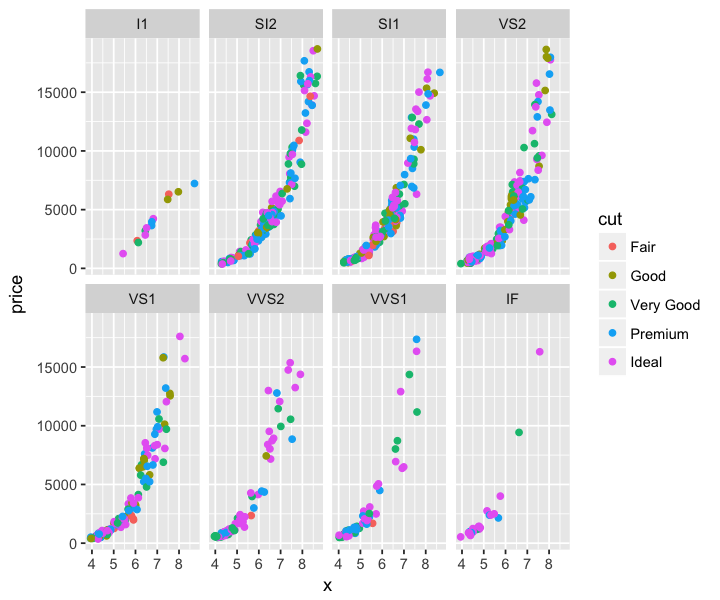

In [45]:
ggplot(dm, aes(x=x, y=price, color=cut)) + 
    geom_point() + 
    facet_wrap(~clarity, nrow=2)


`geom_smooth()` using method = 'gam'


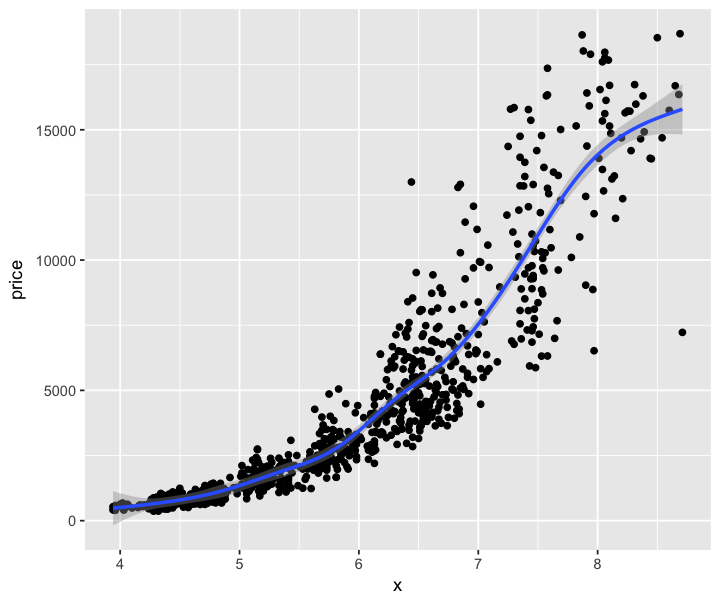

In [46]:
ggplot(dm, aes(x=x, y=price)) +
    geom_point() +
    geom_smooth()


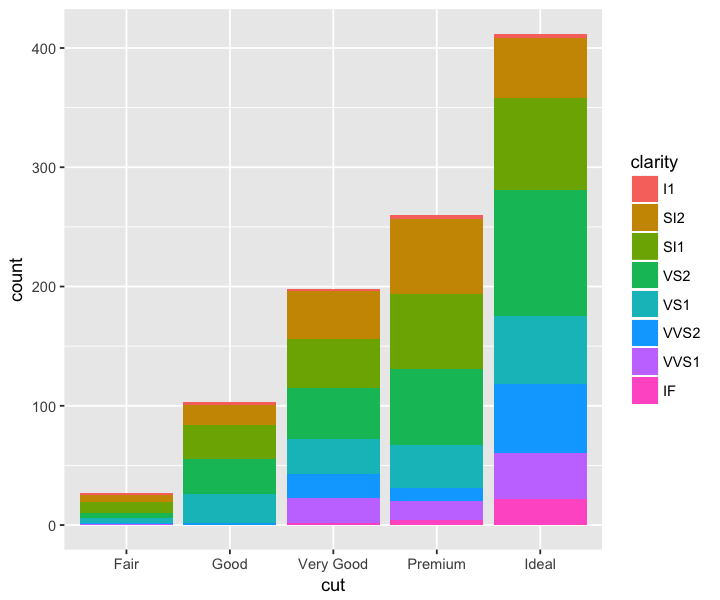

In [60]:
ggplot(dm, aes(x=cut, fill=clarity)) + 
  geom_bar()

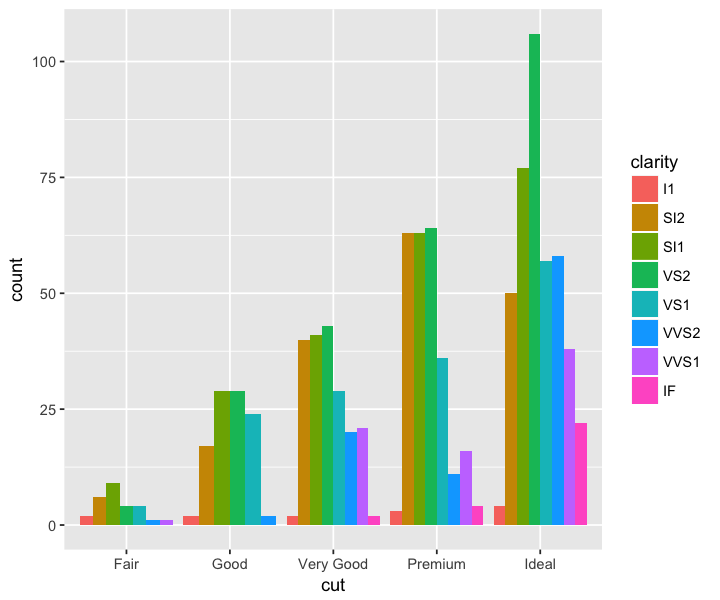

In [156]:
ggplot(dm, aes(x=cut, fill=clarity)) + 
  geom_bar(position="dodge")

## The following plots use the `mpg` dataset

`geom_smooth()` using method = 'loess'


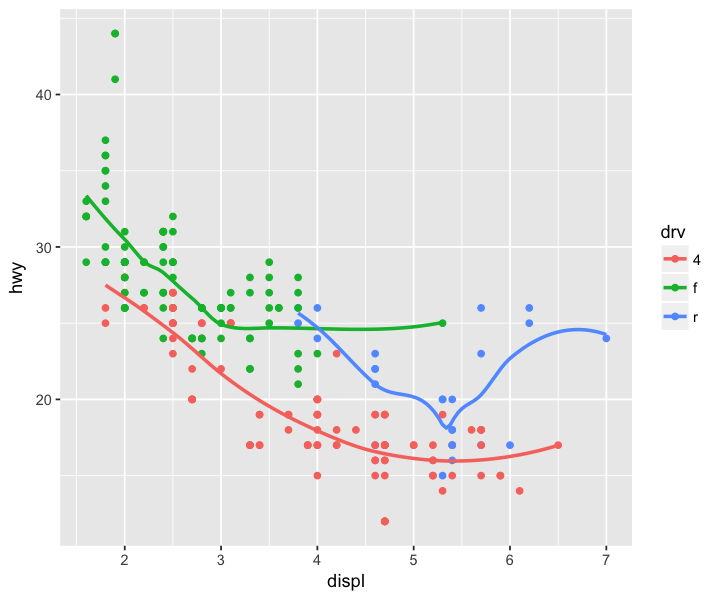

In [62]:
ggplot(mpg, aes(x=displ, y=hwy, color=drv)) + 
    geom_point() + 
    geom_smooth(se=FALSE)

`geom_smooth()` using method = 'loess'


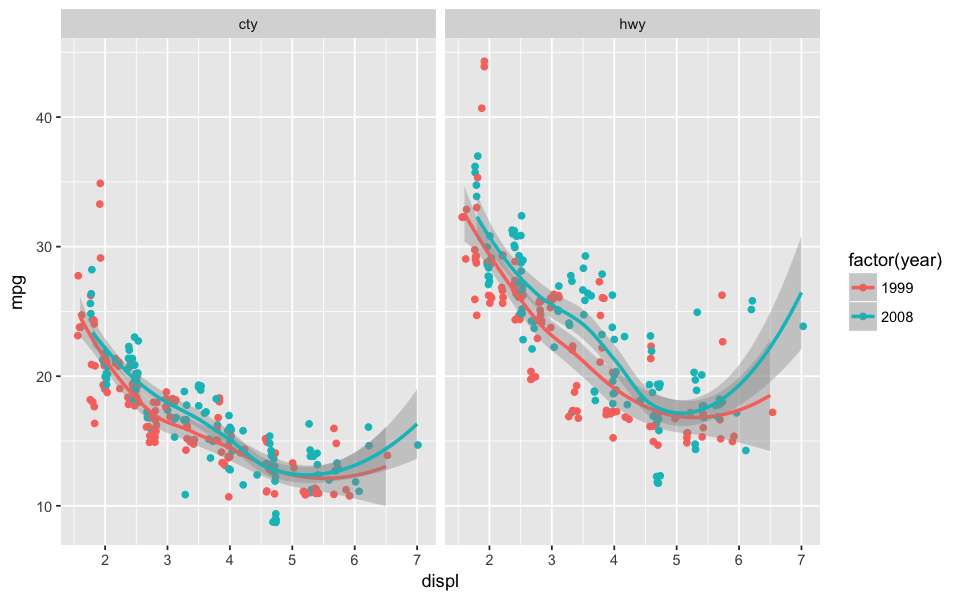

In [157]:
mpg2 = mpg %>% gather(key=variable, value=mpg, cty, hwy)

options(repr.plot.width=8, repr.plot.height=5)

ggplot(mpg2, aes(x=displ, y=mpg, color=factor(year))) +
    geom_point(position='jitter') +
    geom_smooth() +
    facet_wrap(~variable)

options(repr.plot.width=6, repr.plot.height=5)

# 3. Answer the following data questions using `flights` and `weather`

### By month, what proportion of the canceled flights were on snowy days? 
Define snowy days similar to rainy days: a) the daily min temp is less than or equal to freezing, and b) precipitation occured during one or more hours in the day.

To check your work, I got that roughly 76.8% of cancelled flights in February were on snowy days.

In [173]:
dep_snowy = weather %>% group_by(origin, year, month, day) %>%
    summarize(snowy = (min(temp, na.rm=TRUE)<=32) & (sum(precip, na.rm=TRUE)>0))

dep_flights2 = flights %>% filter(is.na(dep_time)) %>%
    select(origin, year, month, day, dep_time) %>%
    inner_join(dep_snowy, by=c('origin', 'year', 'month', 'day')) %>%
    group_by(month) %>% summarize(prop_cancelled_snowy = sum(snowy, na.rm=TRUE)/n())

dep_flights2

month,prop_cancelled_snowy
1,0.32437620
2,0.76764473
3,0.25551684
4,0.00000000
5,0.02486679
6,0.00000000
7,0.00000000
8,0.00000000
9,0.00000000
10,0.00000000


### Replicate the following barplot of cancelled flights

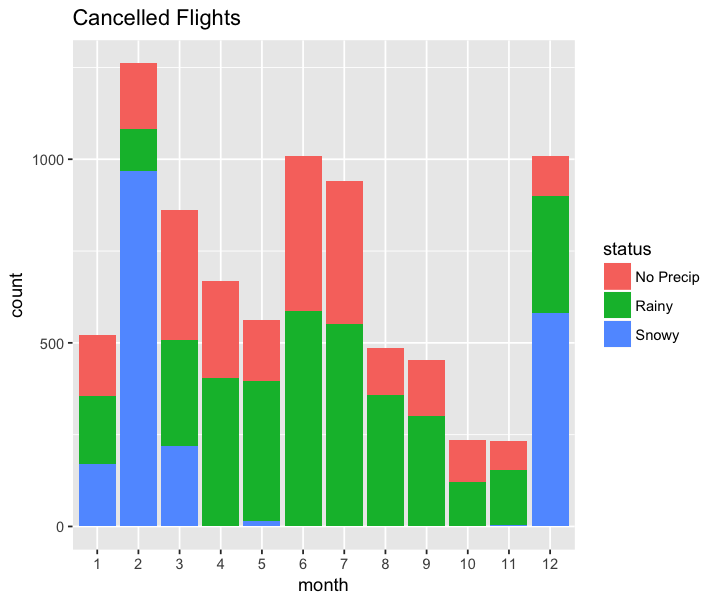

In [174]:
dep_rainy = weather %>% group_by(origin, year, month, day) %>%
    summarize(rainy = (min(temp, na.rm=TRUE)>32) & (sum(precip, na.rm=TRUE)>0))
dep_snowy = weather %>% group_by(origin, year, month, day) %>%
    summarize(snowy = (min(temp, na.rm=TRUE)<=32) & (sum(precip, na.rm=TRUE)>0))

dep_flights3 = flights %>% filter(is.na(dep_time)) %>%
    select(origin, year, month, day, dep_time) %>% 
    inner_join(dep_snowy, by=c('origin', 'year', 'month', 'day')) %>% 
    inner_join(dep_rainy, by=c('origin', 'year', 'month', 'day')) %>%
    mutate(status = case_when(snowy ~ 'Snowy',
                              rainy ~ 'Rainy',
                              TRUE ~ 'No Precip')) %>%
    mutate(month = factor(month))

ggplot(dep_flights3, aes(x=month, fill=status)) +
    geom_bar() + ggtitle('Cancelled Flights')